In [63]:
from NMF import *
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [64]:
K = 4
F = 1025
N = 500
W = np.zeros((F, K))
H = np.zeros((K, N))

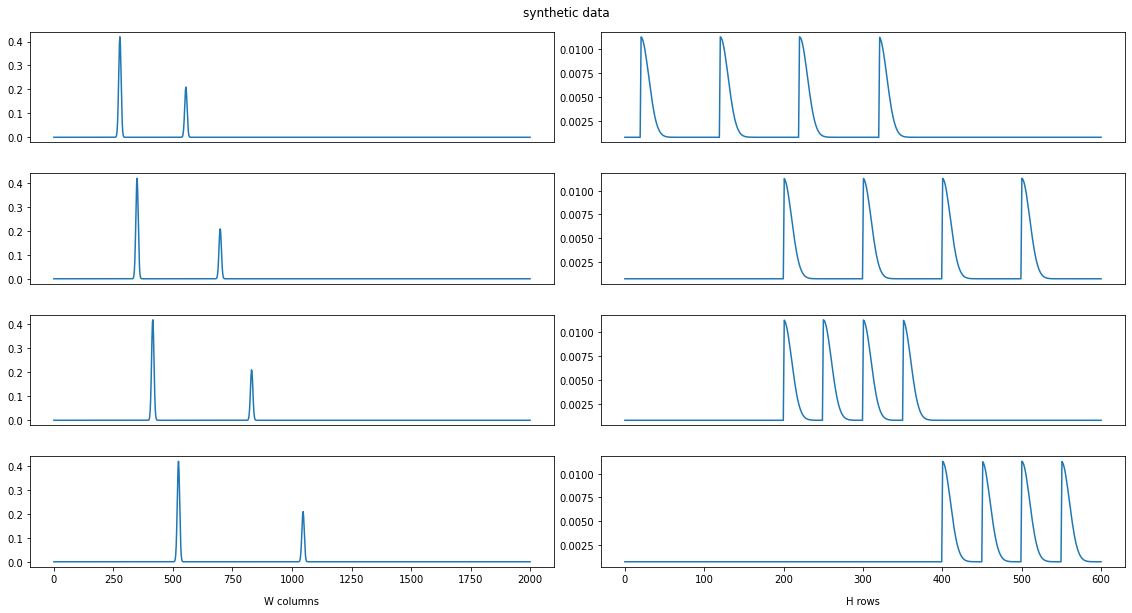

In [71]:
pitches = np.array([61, 65, 68, 72])
times_set = np.array([[20, 120, 220, 320],[200, 300, 400, 500],[200, 250, 300, 350],[400, 450, 500, 550]])
freq_set = 440 * np.power(2, (pitches - 69) / 12)

frequencies = np.linspace(0, 2000, F)
times = np.linspace(0, 600, N)

for i in range(4):
    W[:, i] = stats.norm.pdf(frequencies, loc=freq_set[i], scale=5) + 0.5 * stats.norm.pdf(frequencies, loc=2 * freq_set[i], scale=5)
    for j in range(4):
        H[i, :] += (times > times_set[i, j]) * stats.norm.pdf(times, loc=times_set[i, j], scale=10) 
for k in range(K):
    norm_factor = np.linalg.norm(W[:, k])
    W[:, k] = W[:, k] / norm_factor
    H[k, :] = H[k, :] * norm_factor

fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 2))
fig.tight_layout(pad=1)
for i in range(K):
    axes[i, 0].plot(frequencies, W[:, i])
    axes[i, 1].plot(times, H[i, :])
    if i != (K - 1):
        axes[i, 0].xaxis.set_ticklabels([])
        axes[i, 1].xaxis.set_ticklabels([])
        axes[i, 0].tick_params(axis='x', length=0)
        axes[i, 1].tick_params(axis='x', length=0)
    if i == K - 1:
        axes[i, 0].set_xlabel("W columns", labelpad=12)
        axes[i, 1].set_xlabel("H rows", labelpad=12)
fig.suptitle("synthetic data", y=1.02)
plt.show()

In [72]:
V = W @ H
spec = Spectrogram(V, frequencies)

In [62]:
K = 4
matrix_to_factorize = NMF(V)
costs = matrix_to_factorize.summary_plot(K, 1000)

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

In [ ]:
print(costs[2])

[125713840.85589445, 3464462.3043656154, 3698817.017615423, 3687422.6991966367, 3671938.205640367, 3648839.9178666174, 3614516.0381537396, 3564850.1573035805, 3495938.9058207255, 3405387.4511248795, 3293538.325060517, 3163660.9301312687, 3020887.585321435, 2871136.6902076257, 2721621.903138513, 2582842.351362105, 2469160.6965746195, 2395024.759929568, 2366145.577409236, 2368829.005889911, 2378389.0355821005, 2379781.261890097, 2372980.9307767367, 2366754.7932730024, 2364352.043858388, 2364215.7890025233, 2364810.4836105253, 2365341.7102194354, 2365655.2441552347, 2365797.281803541, 2365897.9126648013, 2366083.51919548, 2366420.4578987095, 2366864.6858529435, 2367266.6481920974, 2367395.306378493, 2366949.7703905897, 2365547.0899394946, 2362685.710623424, 2357678.0288060927, 2349533.2913846313, 2336753.56053375, 2316974.605565073, 2286340.4306129753, 2238505.5391431223, 2163603.8724156534, 2049884.6744501835, 1895589.9712936596, 1726519.9600487829, 1578179.0190771497, 1463616.0601937522

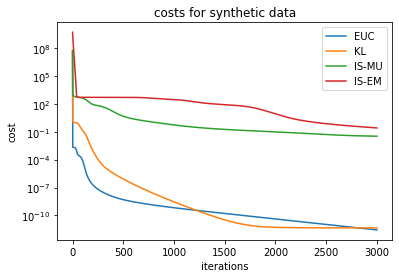

In [ ]:
plt.semilogy(costs[0], label="EUC")
plt.semilogy(costs[1], label="KL")
plt.semilogy(costs[2], label="IS-MU")
plt.semilogy(costs[3], label="IS-EM")
plt.legend()
plt.title("costs for synthetic data")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

**KL_NMF**

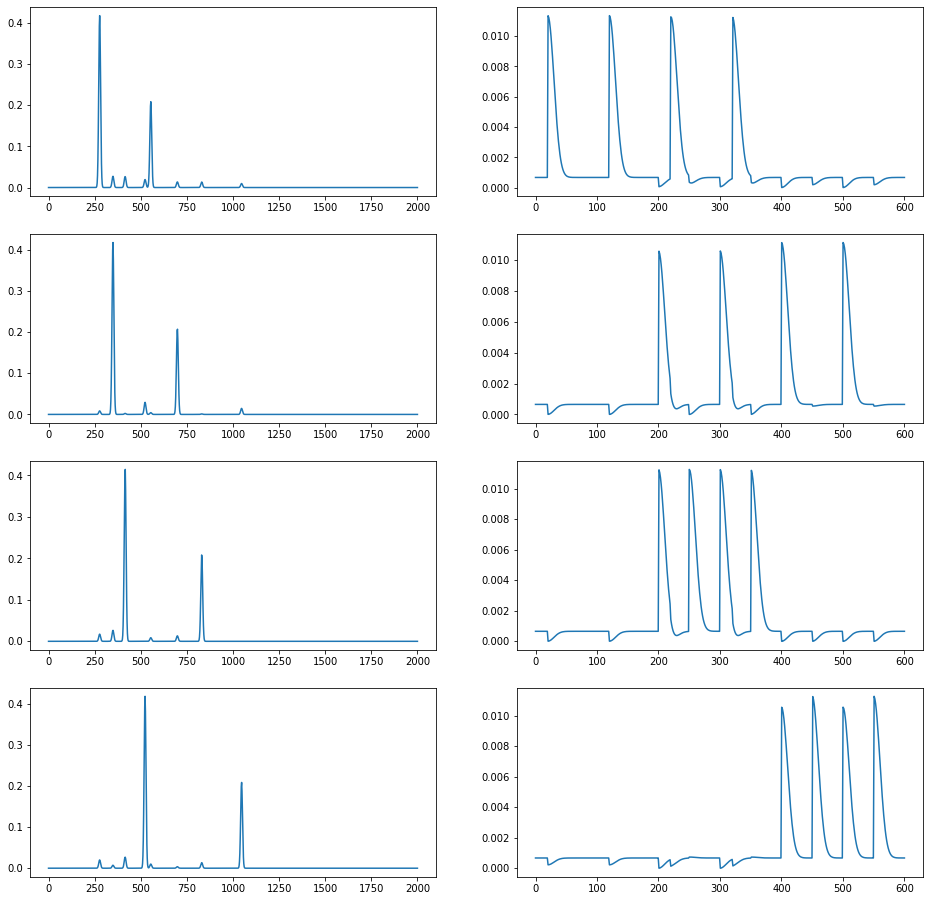

[61. 53. 68. 72.]


In [73]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_KL(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EUC_NMF**

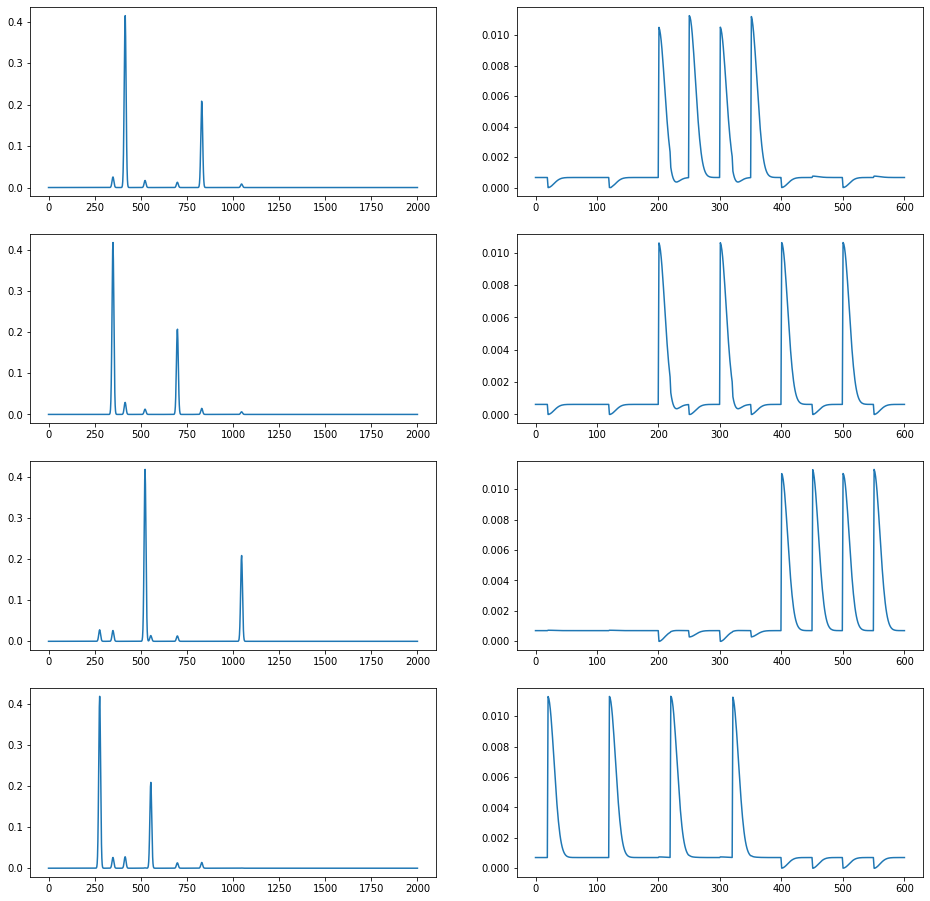

[68. 65. 60. 61.]


In [74]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EUC(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**IS_MU_NMF**

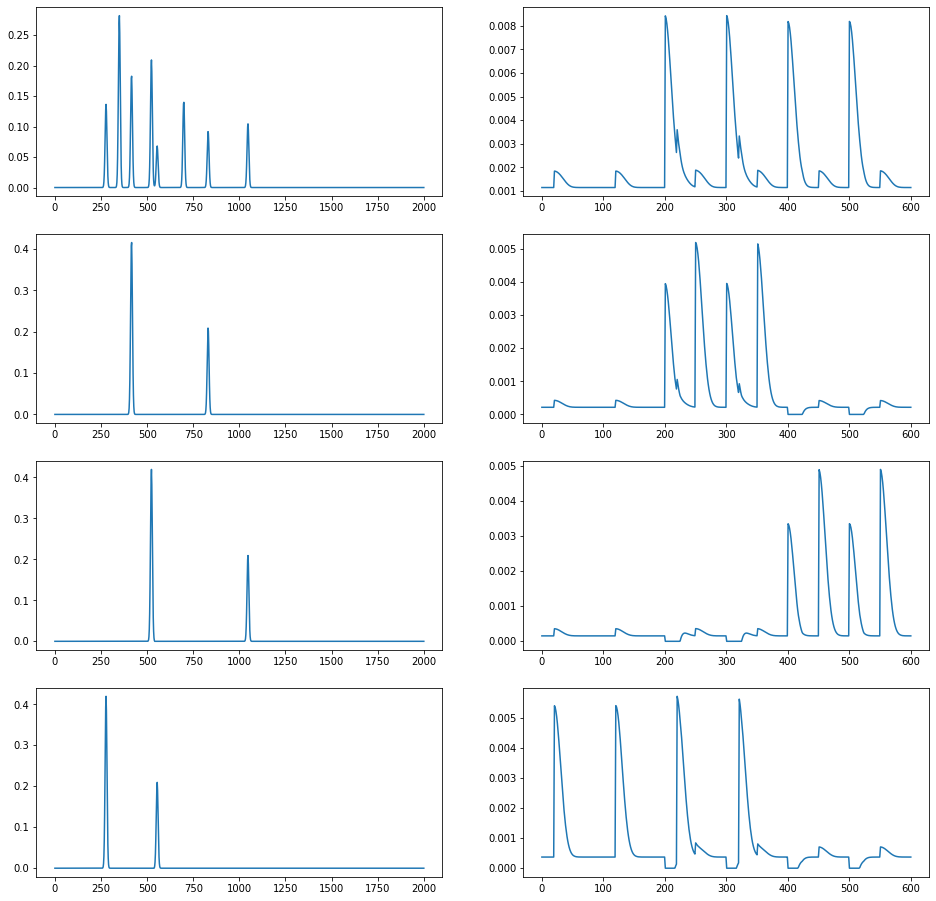

[108.4  68.   72.   61. ]


In [75]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_MU_IS(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EM_IS_NMF**

/home/maria/MachineLearning/NMF.py:396: RuntimeWarning: invalid value encountered in log
  return (x + 1e-09) / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


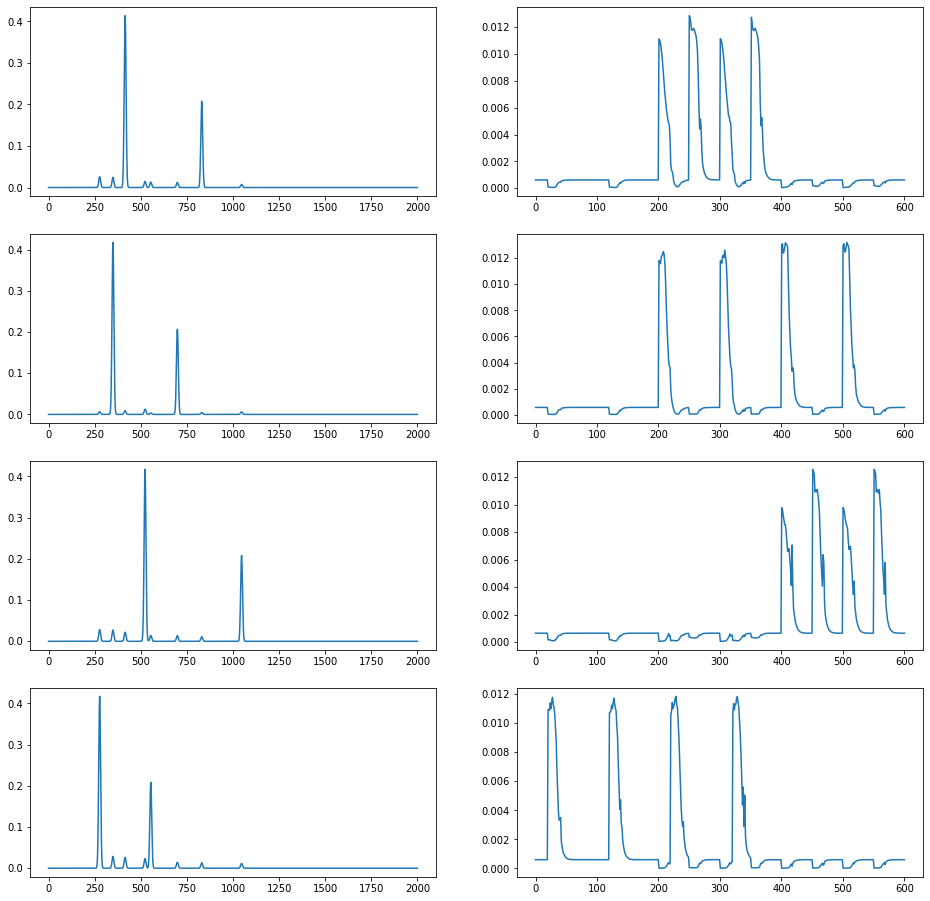

[68. 65. 60. 61.]


In [76]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EM_IS(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

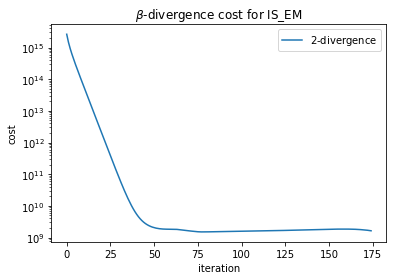

In [57]:
matrix_to_factorize.plot_costs("IS_EM", 2)

**R_EM_IS_NMF**

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1
/home/maria/MachineLearning/NMF.py:338: RuntimeWarning: invalid value encountered in sqrt
  new_h_k = (np.sqrt((p_1 ** 2) - (4 * p_2 * p_0)) - p_1) / (2 * p_2)


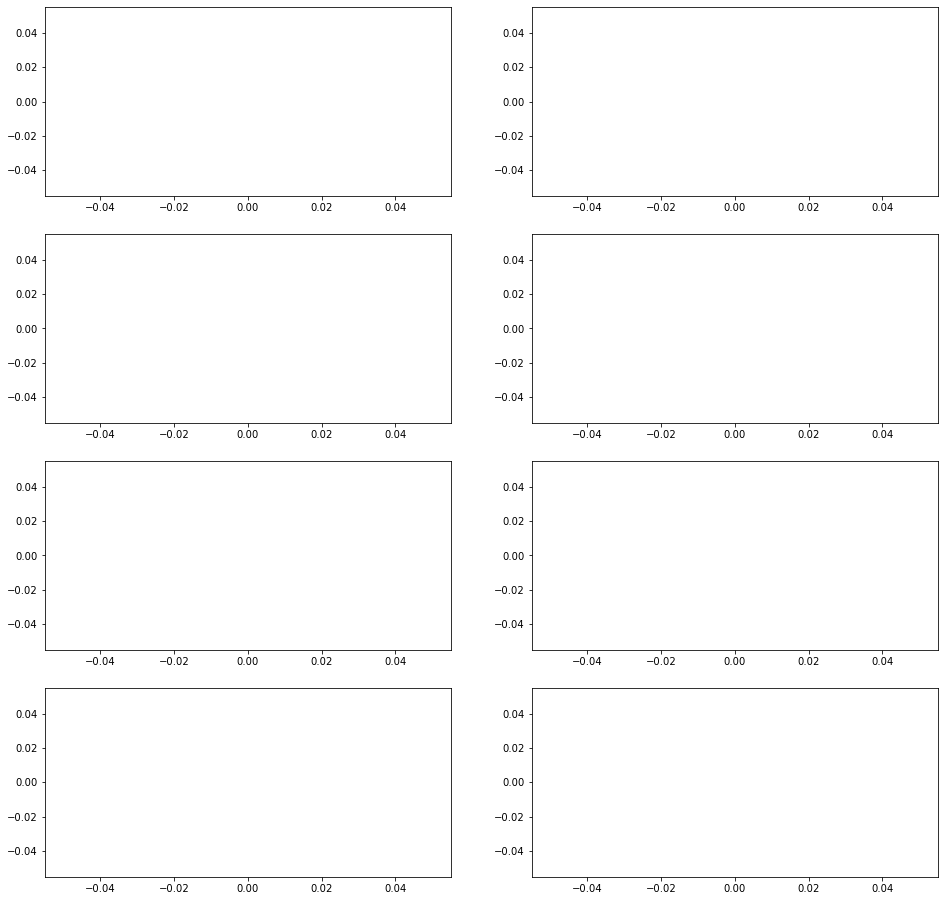

[20.6 20.6 20.6 20.6]


In [11]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_R_EM_IS(K, 5000, alpha=10)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])